Treinamento do modelo de análise de imagens concluído.
Análise da árvore arvore1:
Necessita poda: Sim
Probabilidade de necessidade de poda: 0.75



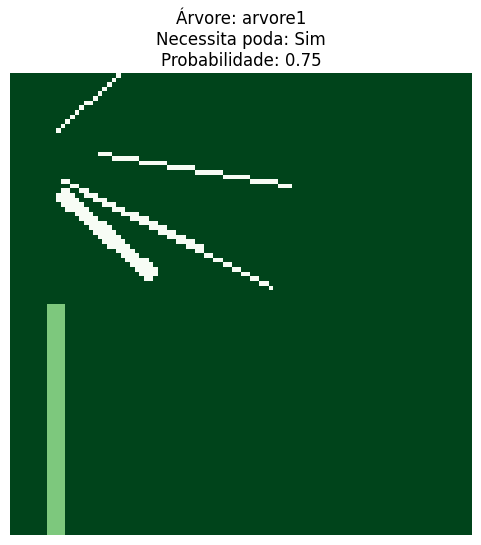

Análise da árvore arvore2:
Necessita poda: Não
Probabilidade de necessidade de poda: 0.37



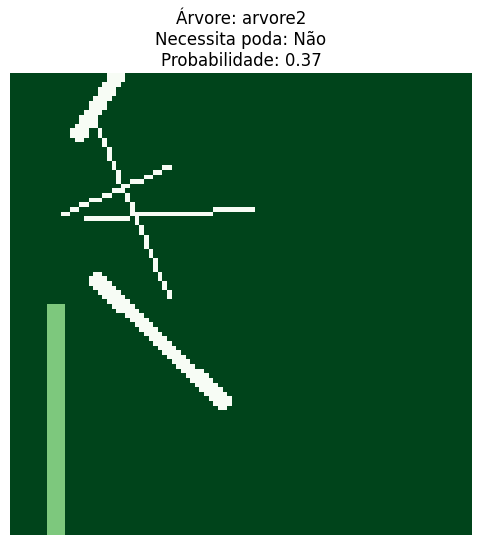

Análise da árvore arvore3:
Necessita poda: Sim
Probabilidade de necessidade de poda: 0.78



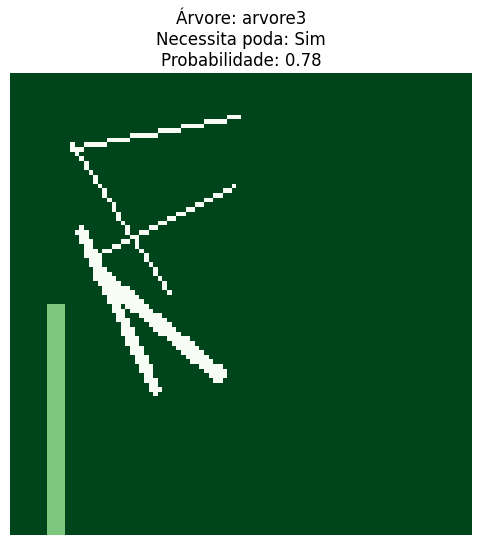

Ordem das árvores a serem podadas:
1. Árvore: arvore3, Prioridade: 0.9
2. Árvore: arvore1, Prioridade: 0.8
3. Árvore: arvore2, Prioridade: 0.5


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def create_tree_image(size=100, branches=5):
    # Definições do tronco
    trunk_start = size // 10
    trunk_end = size // 5
    trunk_thickness = size // 20

    # Criação da imagem
    img = np.ones((size, size), dtype=np.uint8) * 255  # Fundo branco

    # Desenho do tronco
    img[size // 2:, trunk_start - trunk_thickness // 2: trunk_start + trunk_thickness // 2] = 139  # Marrom

    # Desenho dos ramos
    branch_lengths = np.random.randint(size // 4, size // 2, branches)
    branch_angles = np.random.randint(20, 160, branches)
    branch_thickness = np.random.randint(1, 3, branches)

    for length, angle, thickness in zip(branch_lengths, branch_angles, branch_thickness):
        start_x = np.random.randint(trunk_start, trunk_end)
        start_y = np.random.randint(trunk_start, min(trunk_start + length, size))  # Corrigido
        end_x = int(start_x + length * np.sin(np.deg2rad(angle)))
        end_y = int(start_y + length * np.cos(np.deg2rad(angle)))
        # Desenhar linha verde simulando um ramo
        cv2.line(img, (start_x, start_y), (end_x, end_y), 34, thickness)  # Verde

    return img

class SistemaIA:
    def __init__(self):
        self.modelo_analise_imagens = RandomForestClassifier()
        self.label_encoder = LabelEncoder()

    def treinar_modelo_analise_imagens(self, dados_treinamento, labels):
        # Treinamento do modelo de análise de imagens
        dados_encoded = self.label_encoder.fit_transform(dados_treinamento)
        # Redimensionar para duas dimensões
        dados_encoded = dados_encoded.reshape(-1, 1)
        self.modelo_analise_imagens.fit(dados_encoded, labels)
        print("Treinamento do modelo de análise de imagens concluído.")

    def analisar_imagem(self, imagem):
        # Simulação da análise da imagem
        dado_encoded = self.label_encoder.transform([imagem])
        # Redimensionar para duas dimensões
        dado_encoded = dado_encoded.reshape(-1, 1)
        necessita_poda = self.modelo_analise_imagens.predict(dado_encoded)
        probabilidade_necessidade_poda = self.modelo_analise_imagens.predict_proba(dado_encoded)[0][1]
        return necessita_poda[0], probabilidade_necessidade_poda

    def otimizar_rota(self, arvores, prioridades):
        # Ordenar as árvores com base em suas prioridades de poda
        arvores_prioridades = zip(arvores, prioridades)
        arvores_ordenadas = sorted(arvores_prioridades, key=lambda x: x[1], reverse=True)
        print("Ordem das árvores a serem podadas:")
        for i, (arvore, prioridade) in enumerate(arvores_ordenadas, start=1):
            print(f"{i}. Árvore: {arvore}, Prioridade: {prioridade}")

    def mostrar_imagem_arvore(self, arvore, necessita_poda, probabilidade):
        # Simulação da exibição da imagem da árvore com resultados da análise
        plt.figure(figsize=(6, 6))
        plt.imshow(create_tree_image(), cmap='Greens')  # Imagem simulada da árvore
        plt.title(f"Árvore: {arvore}\nNecessita poda: {'Sim' if necessita_poda else 'Não'}\nProbabilidade: {probabilidade:.2f}")
        plt.axis('off')
        plt.show()


# Exemplo de utilização
sistema = SistemaIA()

# Dados de treinamento (exemplo simples)
dados_treinamento_imagens = ['arvore1', 'arvore2', 'arvore3']
labels = [1, 0, 1]  # 1: Necessita poda, 0: Não necessita poda

# Treinamento do modelo de análise de imagens
sistema.treinar_modelo_analise_imagens(dados_treinamento_imagens, labels)

# Simulação de análise de imagem e otimização de rota
arvores = ['arvore1', 'arvore2', 'arvore3']  # Corrigido para usar nomes sem espaços
prioridades = [0.8, 0.5, 0.9]  # Exemplo de prioridades de poda

for arvore in arvores:
    necessita_poda, probabilidade = sistema.analisar_imagem(arvore)
    print(f"Análise da árvore {arvore}:")
    print(f"Necessita poda: {'Sim' if necessita_poda else 'Não'}")
    print(f"Probabilidade de necessidade de poda: {probabilidade:.2f}\n")
    # Mostrar imagem da árvore com resultados da análise
    sistema.mostrar_imagem_arvore(arvore, necessita_poda, probabilidade)

sistema.otimizar_rota(arvores, prioridades)
